In [1]:
import re
import nltk
import spacy
import random
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# <span style="color:#674ea7"> 💾 Cargar Dataset </span>

In [2]:
comments_data = pd.read_csv('/content/youtoxic_english_1000.csv')
comments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


## <span style="color:#674ea7"> ⭕ Comprobar valores nulos </span>

In [3]:
print(comments_data.isnull().sum())

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64


## <span style="color:#674ea7"> 📊 Análisis estadístico descriptivo </span>

In [4]:
comments_data.describe().T

count unique                   top  freq
CommentId        1000   1000  UgjBJKQSoQMQ6ngCoAEC     1
VideoId          1000     13           9pr1oE34bIM   274
Text             1000    997         run them over     3
IsToxic          1000      2                 False   538
IsAbusive        1000      2                 False   647
IsThreat         1000      2                 False   979
IsProvocative    1000      2                 False   839
IsObscene        1000      2                 False   900
IsHatespeech     1000      2                 False   862
IsRacist         1000      2                 False   875
IsNationalist    1000      2                 False   992
IsSexist         1000      2                 False   999
IsHomophobic     1000      1                 False  1000
IsReligiousHate  1000      2                 False   988
IsRadicalism     1000      1                 False  1000

## <span style="color:#674ea7"> ☝ valores unicos </span>

In [5]:
features = []
n_values = []

for col in comments_data.columns:
    features.append(col)
    n_values.append(comments_data[col].unique())

valores_unicos = pd.DataFrame({'feature': features, 'n_values': n_values})

print(valores_unicos)

            feature                                           n_values
0         CommentId  [Ugg2KwwX0V8-aXgCoAEC, Ugg2s5AzSPioEXgCoAEC, U...
1           VideoId  [04kJtp6pVXI, 4rCweDxDqdw, 5vF4si3hoRA, 8HB18h...
2              Text  [If only people would just take a step back an...
3           IsToxic                                      [False, True]
4         IsAbusive                                      [False, True]
5          IsThreat                                      [False, True]
6     IsProvocative                                      [False, True]
7         IsObscene                                      [False, True]
8      IsHatespeech                                      [False, True]
9          IsRacist                                      [False, True]
10    IsNationalist                                      [False, True]
11         IsSexist                                      [False, True]
12     IsHomophobic                                            [False]
13  Is

## <span style="color:#674ea7"> ✌ valores duplicados </span>

In [6]:
# Check for duplicate comments
duplicate_rows = comments_data[comments_data.duplicated(subset=['Text'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

# Drop duplicate comments
comments_data.drop_duplicates(subset=['Text'], keep='first', inplace=True)

# Confirm duplicates are removed
print("Number of rows after removing duplicates:", len(comments_data))

# Reindex the DataFrame after dropping duplicates
comments_data.reset_index(drop=True, inplace=True)

Duplicate rows based on 'Text' column:
                      CommentId      VideoId           Text  IsToxic  \
592        UgiXm5jxvkdIxHgCoAEC  cT14IbTDW2c  RUN THEM OVER     True   
642  Ugxen2QgJYhNiRrMegR4AaABAg  cT14IbTDW2c  run them over     True   
657  UgxXtUmfp0rdwXB8qld4AaABAg  cT14IbTDW2c  run them over     True   
677  UgyjhPsMlWKlFNmG-h94AaABAg  cT14IbTDW2c  run them over     True   
699  UgzFZGnqcjZcW7wejI54AaABAg  cT14IbTDW2c  RUN THEM OVER     True   

     IsAbusive  IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
592       True     False           True      False         False     False   
642       True      True          False      False         False     False   
657       True     False           True      False         False     False   
677       True     False           True      False         False     False   
699       True     False           True      False         False     False   

     IsNationalist  IsSexist  IsHomophobic  IsReligiousHate

## <span style="color:#674ea7"> 📊 Visualización de datos </span>

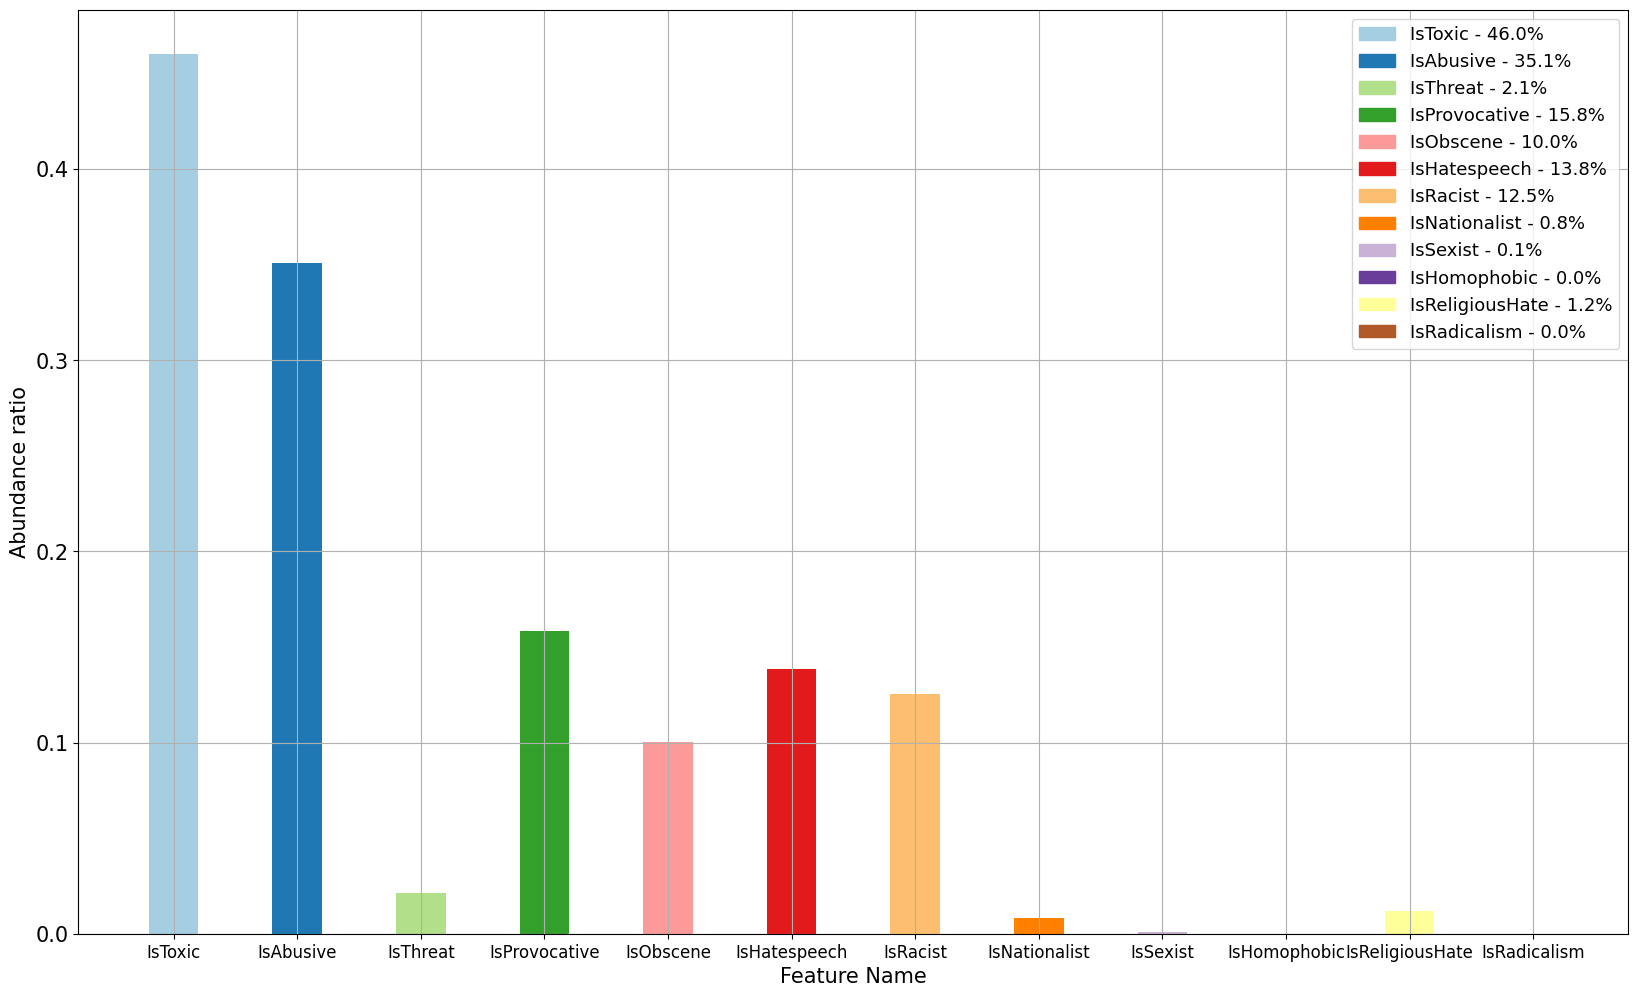

In [7]:
excluded_columns = ['CommentId', 'VideoId', 'Text']
columns_names = [col for col in comments_data.columns if col not in excluded_columns]

# columns_names = comments_data.columns.tolist()
bar_data = {}
for name in columns_names:
    bar_data[name] = len(comments_data.loc[comments_data[name] == 1]) / len(comments_data[name])


bar_name = list(bar_data.keys())
values = list(bar_data.values())
fig = plt.figure(figsize = (20, 12))
colors = plt.cm.Paired(np.arange(12))

plt.bar(bar_name, values, color = colors, width = 0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Feature Name", fontsize=15)
plt.ylabel("Abundance ratio", fontsize=15)
#plt.title("Percentage of each feature from all comments", fontsize=30)

patch = [mpatches.Patch(color=color, label=f"{bar_name} - {value*100:.1f}%")
         for color,value, bar_name in zip(colors, values, bar_name)]
plt.legend(handles=patch, fontsize=13)
plt.grid()
plt.show()


#### <span style="color:#4e62a7"> Frecuencia de Etiquetas </span>
Se analizó el porcentaje de aparición de cada característica (`IsToxic`, `IsHateSpeech`, etc.) respecto al total de comentarios. Esto permitió entender qué tipos de discursos predominan.

IsToxic            1.000000
IsAbusive          0.796282
IsProvocative      0.469821
IsHatespeech       0.433938
IsRacist           0.409903
IsObscene          0.361484
IsThreat           0.158807
IsReligiousHate    0.119497
IsNationalist      0.097371
IsSexist           0.034305
IsHomophobic            NaN
IsRadicalism            NaN
Name: IsToxic, dtype: float64


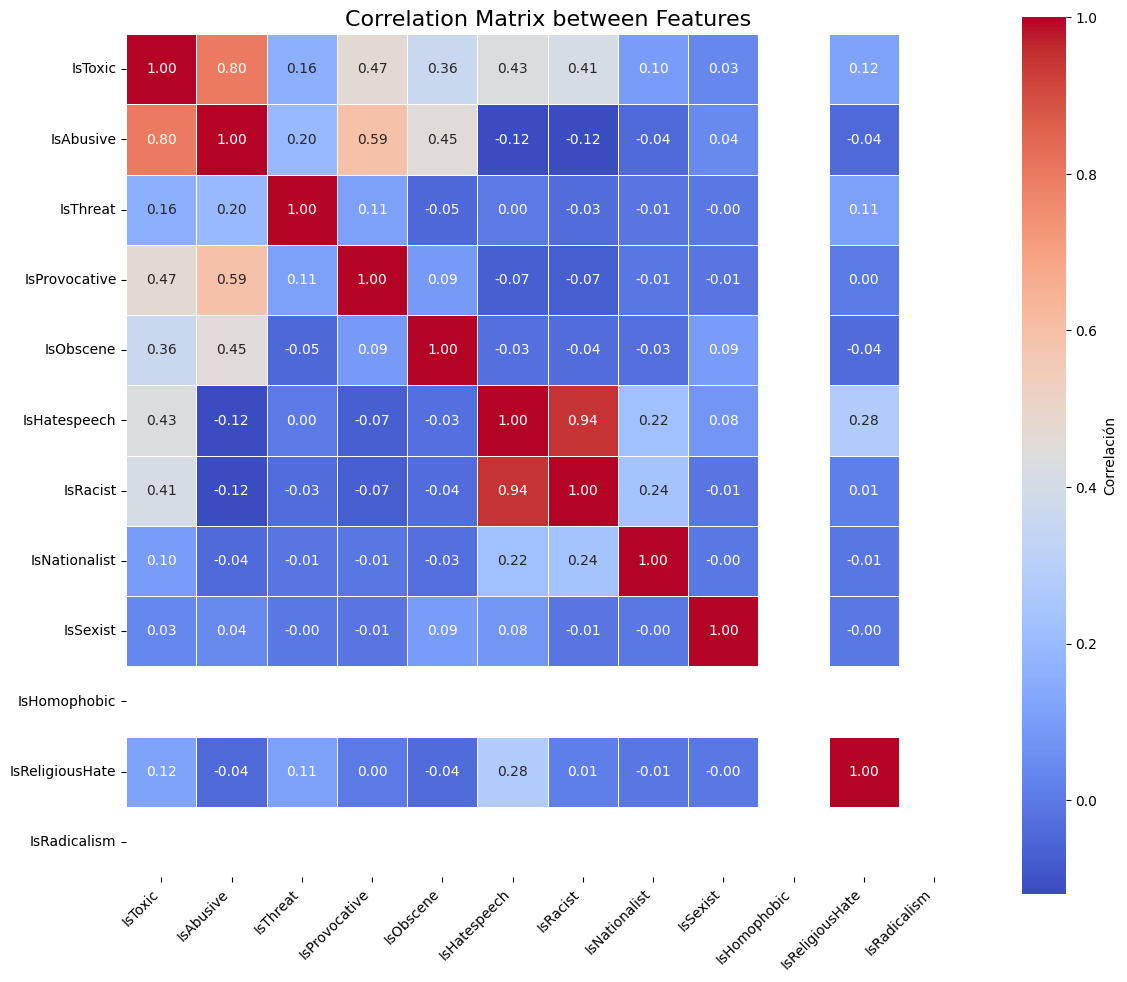

In [8]:
excluded_columns = ['CommentId', 'VideoId', 'Text']
numeric_data = comments_data.drop(columns=excluded_columns)

corr_matrix = numeric_data.corr()

sorted_corr = corr_matrix["IsToxic"].sort_values(ascending=False)

print(sorted_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={'label': 'Correlación'}, linewidths=0.5)

plt.title('Correlation Matrix between Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Se generó una matriz de correlación entre las etiquetas. Algunas observaciones clave:

- `IsToxic` presenta alta correlación con `IsHateSpeech` y `IsRacist`, lo que indica una fuerte asociación semántica.
- Características con baja correlación y/o baja frecuencia como `IsRadicalism`, `IsSexist`, `IsHomophobic` y `IsNationalist` fueron eliminadas del análisis posterior para reducir dimensionalidad.

In [9]:
comments_data.drop(["IsRadicalism", "IsHomophobic", "IsSexist", "IsNationalist"],
          axis = 1, inplace = True)

-----

## <span style="color:#674ea7"> 🔍 Análisis univariado </span>



### <span style="color:#944ea7"> 🧪 Análisis Is Toxic </span>

In [10]:
# Distribution of 'Toxic' column
toxic_distribution = comments_data['IsToxic'].value_counts()
print(toxic_distribution)

IsToxic
False    538
True     459
Name: count, dtype: int64


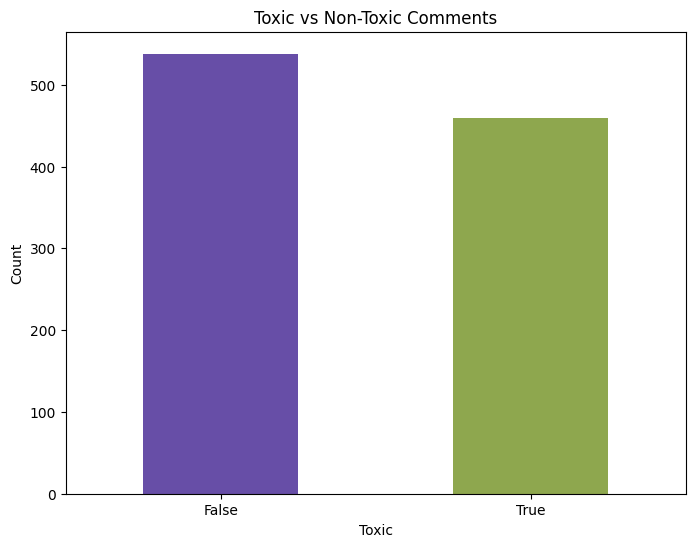

In [11]:
# Bar plot for Toxic vs Non-Toxic Comments
plt.figure(figsize=(8, 6))
toxic_counts = comments_data['IsToxic'].value_counts()
toxic_counts.plot(kind='bar', color=['#674ea7', '#8ea74e'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### <span style="color:#4e62a7"> ☁ WordCloud </span>

In [12]:
untoxic_comments = comments_data.Text.loc[comments_data.IsToxic==0]
new_untoxic_commentss = untoxic_comments.value_counts().to_frame().head(1000)
full_untoxic_commentss = "".join(new_untoxic_commentss.index.tolist())

toxic_comments = comments_data.Text.loc[comments_data.IsToxic==1]
new_toxic_commentss = toxic_comments.value_counts().to_frame().head(1000)
full_toxic_commentss = "".join(new_toxic_commentss.index.tolist())

wordcloud_untoxic = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="white") \
    .generate(full_untoxic_commentss)

wordcloud_toxic = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="black") \
    .generate(full_toxic_commentss)

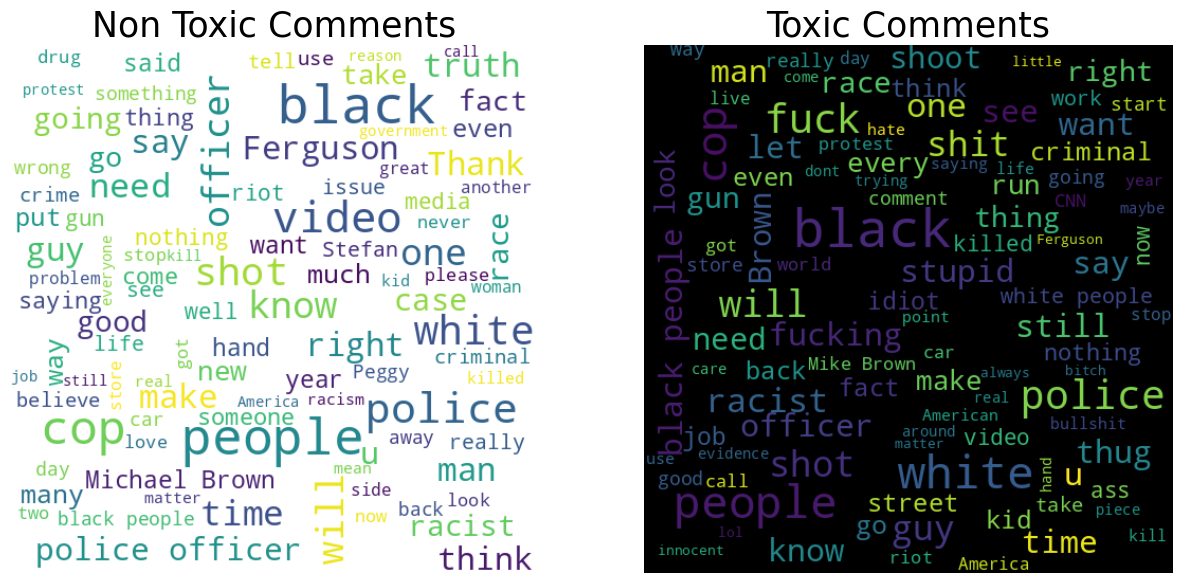

In [13]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(wordcloud_untoxic, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(wordcloud_toxic, interpolation="bilinear")
ax2.axis("off")
ax1.set_title("Non Toxic Comments", fontsize=25)
ax2.set_title("Toxic Comments", fontsize=25)
plt.show()

-----

### <span style="color:#944ea7"> 🚨 Análisis Is Abusive </span>

In [14]:
# Distribution of 'Abusive' column
abusive_distribution = comments_data['IsAbusive'].value_counts()
print(abusive_distribution)

IsAbusive
False    647
True     350
Name: count, dtype: int64


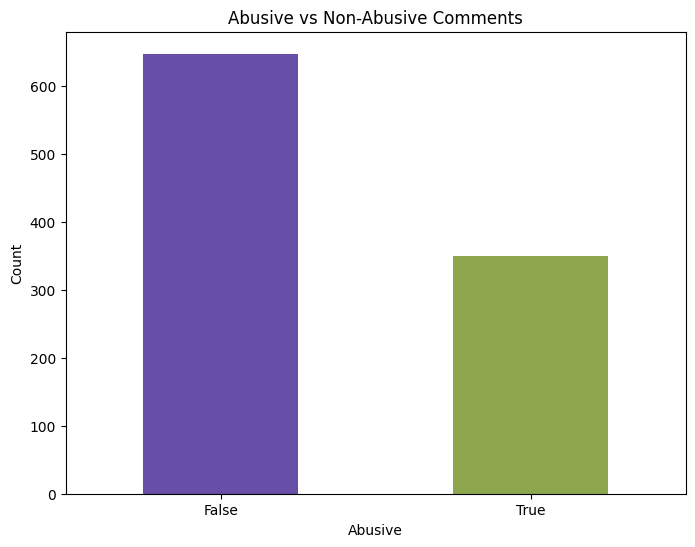

In [15]:
# Bar plot for Abusive vs Non-Abusive Comments
plt.figure(figsize=(8, 6))
abusive_counts = comments_data['IsAbusive'].value_counts()
abusive_counts.plot(kind='bar', color=['#674ea7', '#8ea74e'])
plt.title('Abusive vs Non-Abusive Comments')
plt.xlabel('Abusive')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### <span style="color:#4e62a7"> ☁ WordCloud </span>

In [16]:
unabusive_comments = comments_data.Text.loc[comments_data.IsAbusive==0]
new_unabusive_commentss = unabusive_comments.value_counts().to_frame().head(1000)
full_unabusive_commentss = "".join(new_unabusive_commentss.index.tolist())

abusive_comments = comments_data.Text.loc[comments_data.IsAbusive==1]
new_abusive_commentss = abusive_comments.value_counts().to_frame().head(1000)
full_abusive_commentss = "".join(new_abusive_commentss.index.tolist())

wordcloud_unabusive = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="white") \
    .generate(full_unabusive_commentss)

wordcloud_abusive = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="black") \
    .generate(full_abusive_commentss)

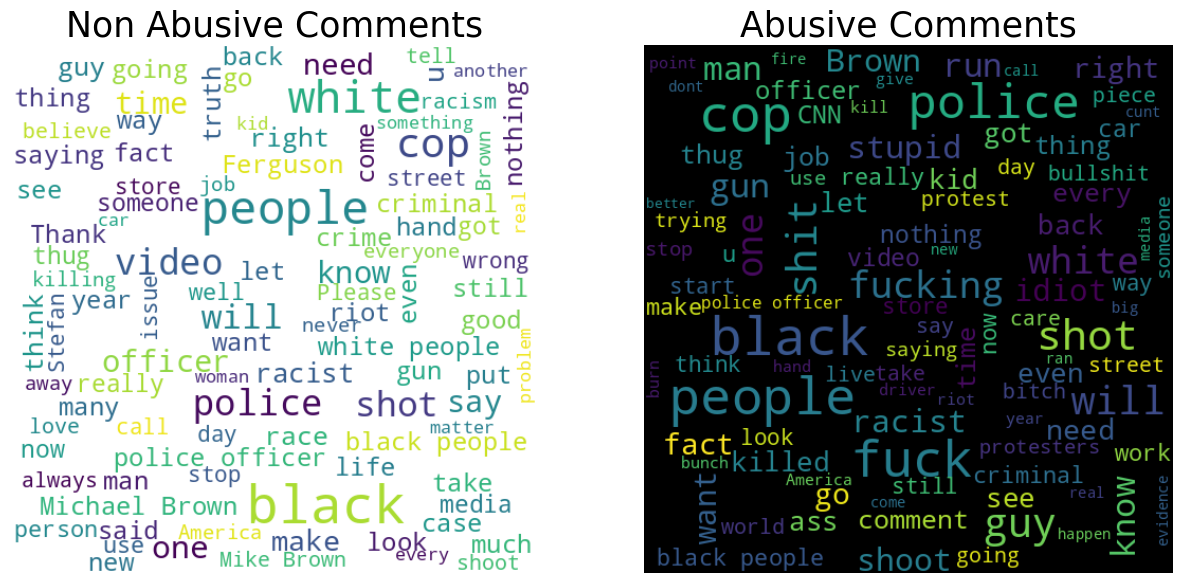

In [17]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(wordcloud_unabusive, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(wordcloud_abusive, interpolation="bilinear")
ax2.axis("off")
ax1.set_title("Non Abusive Comments", fontsize=25)
ax2.set_title("Abusive Comments", fontsize=25)
plt.show()

------

### <span style="color:#944ea7"> 🔪 Análisis Is Threat </span>

In [18]:
# Distribution of 'Threat' column
threat_distribution = comments_data['IsThreat'].value_counts()
print(threat_distribution)

IsThreat
False    976
True      21
Name: count, dtype: int64


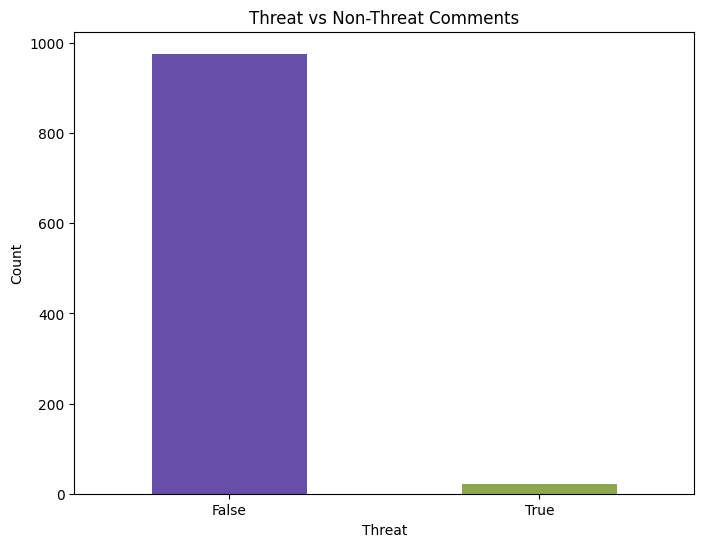

In [19]:
# Bar plot for Threat vs Non-Threat Comments
plt.figure(figsize=(8, 6))
threat_counts = comments_data['IsThreat'].value_counts()
threat_counts.plot(kind='bar', color=['#674ea7', '#8ea74e'])
plt.title('Threat vs Non-Threat Comments')
plt.xlabel('Threat')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### <span style="color:#4e62a7"> ☁ WordCloud </span>

In [20]:
unthreat_comments = comments_data.Text.loc[comments_data.IsThreat==0]
new_unthreat_commentss = unthreat_comments.value_counts().to_frame().head(1000)
full_unthreat_commentss = "".join(new_unthreat_commentss.index.tolist())

threat_comments = comments_data.Text.loc[comments_data.IsThreat==1]
new_threat_commentss = threat_comments.value_counts().to_frame().head(1000)
full_threat_commentss = "".join(new_threat_commentss.index.tolist())

wordcloud_unthreat = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="white") \
    .generate(full_unthreat_commentss)

wordcloud_threat = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="black") \
    .generate(full_threat_commentss)

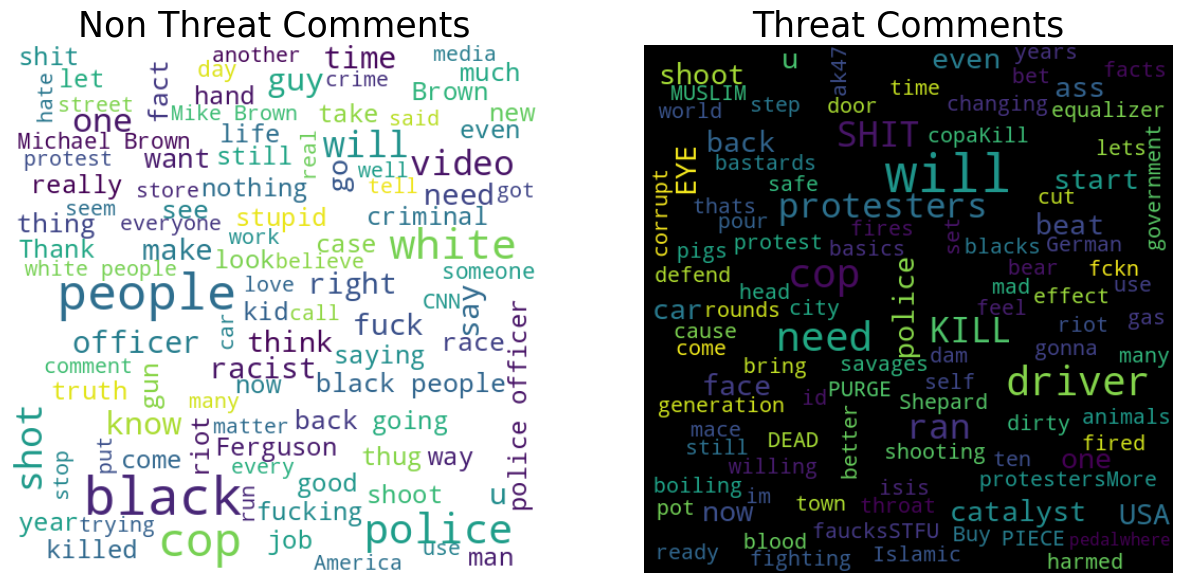

In [21]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(wordcloud_unthreat, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(wordcloud_threat, interpolation="bilinear")
ax2.axis("off")
ax1.set_title("Non Threat Comments", fontsize=25)
ax2.set_title("Threat Comments", fontsize=25)
plt.show()

-----

### <span style="color:#944ea7"> 🪃 Análisis Is Provocative </span>

In [22]:
# Distribution of 'Provocative' column
provocative_distribution = comments_data['IsProvocative'].value_counts()
print(provocative_distribution)

IsProvocative
False    839
True     158
Name: count, dtype: int64


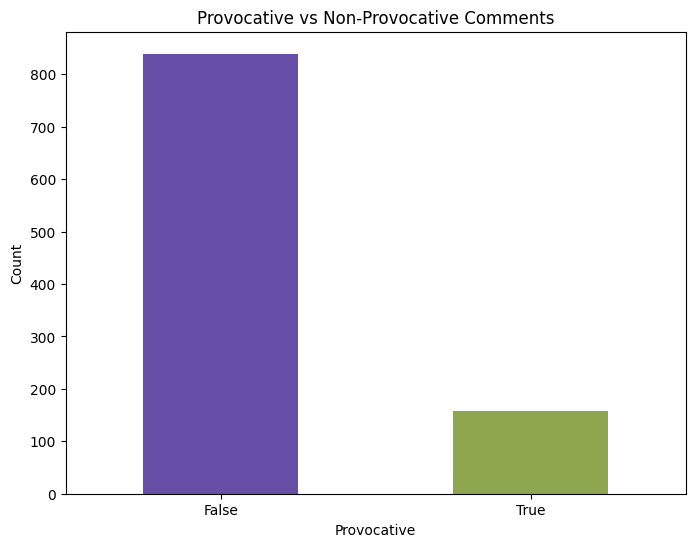

In [23]:
# Bar plot for Provocative vs Non-ProvocativeComments
plt.figure(figsize=(8, 6))
provocative_counts = comments_data['IsProvocative'].value_counts()
provocative_counts.plot(kind='bar', color=['#674ea7', '#8ea74e'])
plt.title('Provocative vs Non-Provocative Comments')
plt.xlabel('Provocative')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### <span style="color:#4e62a7"> ☁ WordCloud </span>

In [24]:
unprovocative_comments = comments_data.Text.loc[comments_data.IsProvocative==0]
new_unprovocative_commentss = unprovocative_comments.value_counts().to_frame().head(1000)
full_unprovocative_commentss = "".join(new_unprovocative_commentss.index.tolist())

provocative_comments = comments_data.Text.loc[comments_data.IsProvocative==1]
new_provocative_commentss = provocative_comments.value_counts().to_frame().head(1000)
full_provocative_commentss = "".join(new_provocative_commentss.index.tolist())

wordcloud_unprovocative = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="white") \
    .generate(full_unprovocative_commentss)

wordcloud_provocative = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="black") \
    .generate(full_provocative_commentss)

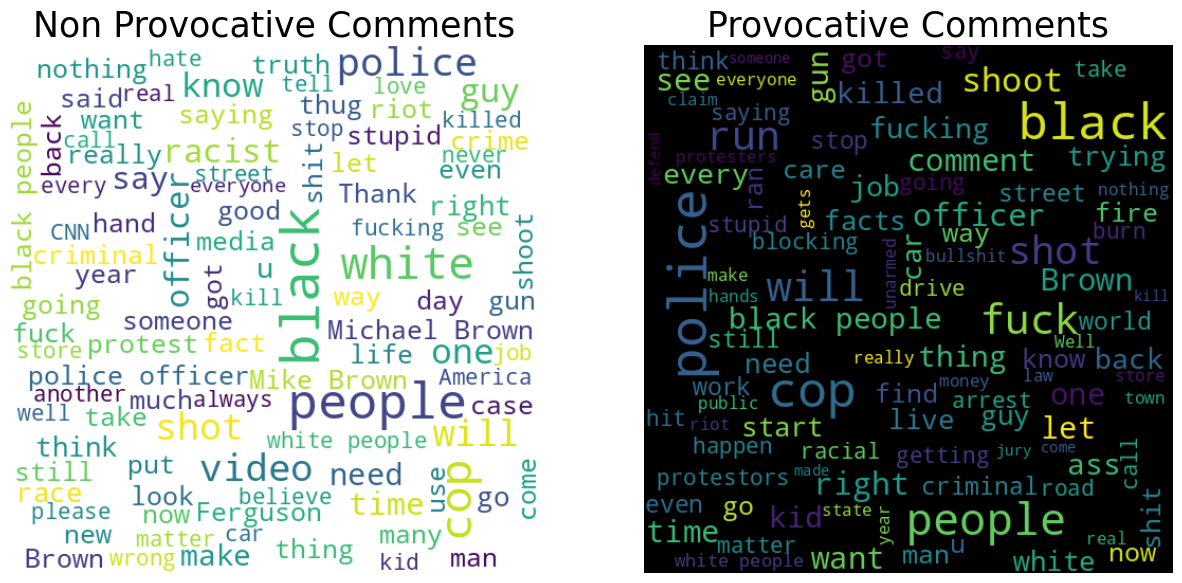

In [25]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(wordcloud_unprovocative, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(wordcloud_provocative, interpolation="bilinear")
ax2.axis("off")
ax1.set_title("Non Provocative Comments", fontsize=25)
ax2.set_title("Provocative Comments", fontsize=25)
plt.show()

----

### <span style="color:#944ea7"> ❌ Análisis Is Obscene </span>

In [26]:
# Distribution of 'Obscene' column
obscene_distribution = comments_data['IsObscene'].value_counts()
print(obscene_distribution)

IsObscene
False    897
True     100
Name: count, dtype: int64


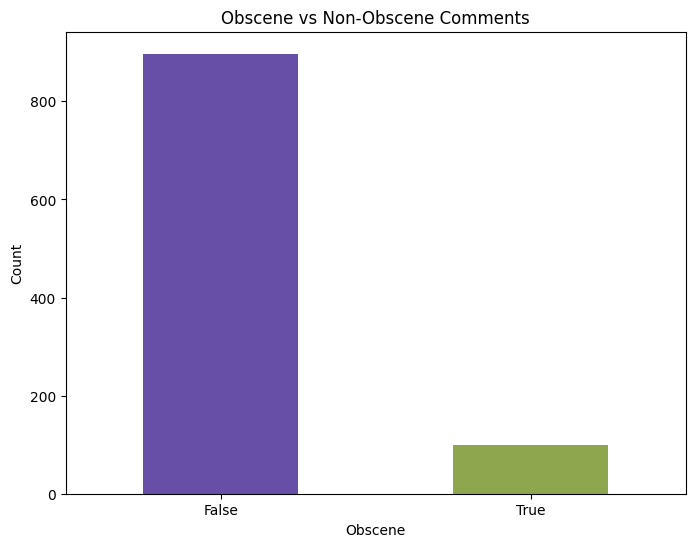

In [27]:
# Bar plot for Obscene vs Non-Obscene Comments
plt.figure(figsize=(8, 6))
obscene_counts = comments_data['IsObscene'].value_counts()
obscene_counts.plot(kind='bar', color=['#674ea7', '#8ea74e'])
plt.title('Obscene vs Non-Obscene Comments')
plt.xlabel('Obscene')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### <span style="color:#4e62a7"> ☁ WordCloud </span>

In [28]:
unobscene_comments = comments_data.Text.loc[comments_data.IsObscene==0]
new_unobscene_commentss = unobscene_comments.value_counts().to_frame().head(1000)
full_unobscene_commentss = "".join(new_unobscene_commentss.index.tolist())

obscene_comments = comments_data.Text.loc[comments_data.IsObscene==1]
new_obscene_commentss = obscene_comments.value_counts().to_frame().head(1000)
full_obscene_commentss = "".join(new_obscene_commentss.index.tolist())

wordcloud_unobscene = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="white") \
    .generate(full_unobscene_commentss)

wordcloud_obscene = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="black") \
    .generate(full_obscene_commentss)

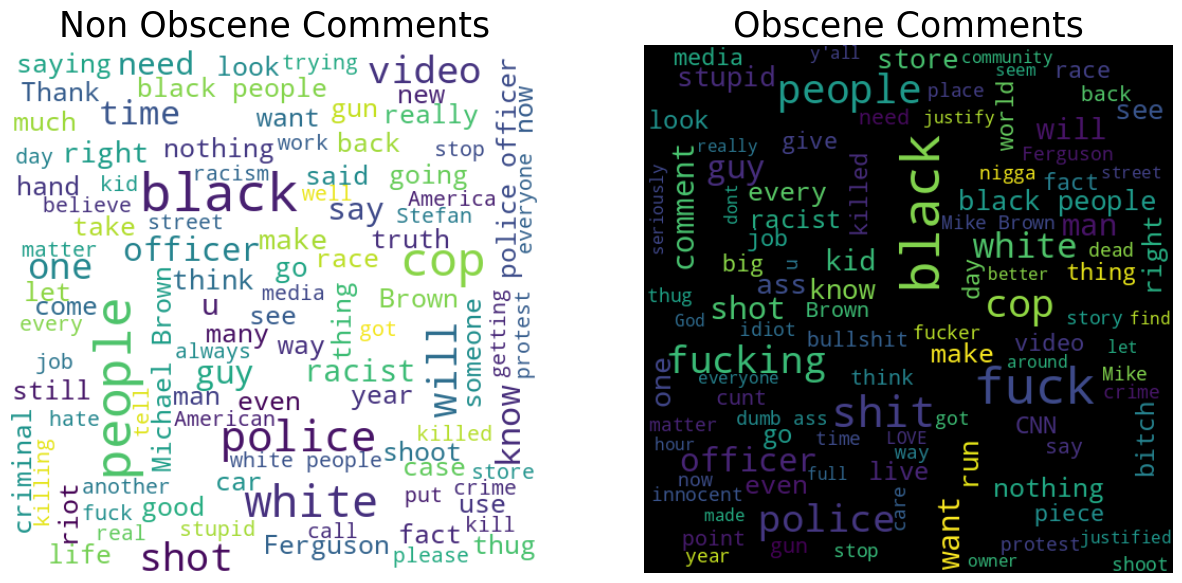

In [29]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(wordcloud_unobscene, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(wordcloud_obscene, interpolation="bilinear")
ax2.axis("off")
ax1.set_title("Non Obscene Comments", fontsize=25)
ax2.set_title("Obscene Comments", fontsize=25)
plt.show()

-----

### <span style="color:#944ea7"> 💁 Análisis Is Hatespeech </span>

In [30]:
# Distribution of 'Hatespeech' column
hatespeech_distribution = comments_data['IsHatespeech'].value_counts()
print(hatespeech_distribution)

IsHatespeech
False    859
True     138
Name: count, dtype: int64


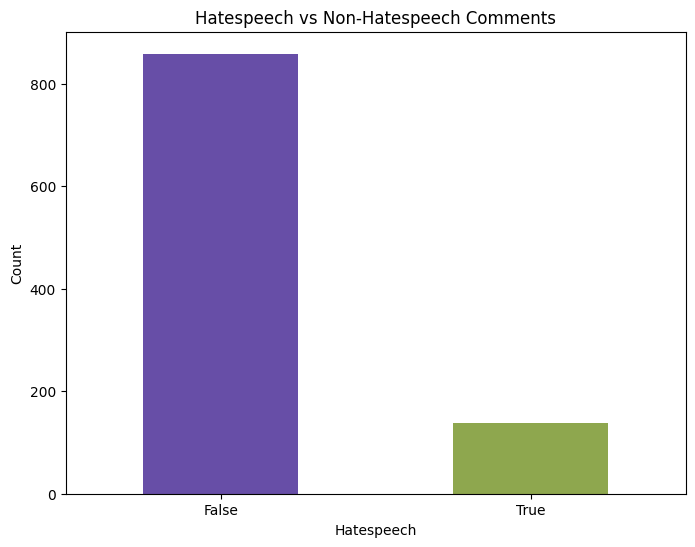

In [31]:
# Bar plot for Hatespeech vs Non-Hatespeech Comments
plt.figure(figsize=(8, 6))
hatespeech_counts = comments_data['IsHatespeech'].value_counts()
hatespeech_counts.plot(kind='bar', color=['#674ea7', '#8ea74e'])
plt.title('Hatespeech vs Non-Hatespeech Comments')
plt.xlabel('Hatespeech')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### <span style="color:#4e62a7"> ☁ WordCloud </span>

In [32]:
nothatespeech_comments = comments_data.Text.loc[comments_data.IsHatespeech==0]
new_nothatespeeche_commentss = nothatespeech_comments.value_counts().to_frame().head(1000)
full_nothatespeech_commentss = "".join(new_nothatespeeche_commentss.index.tolist())

hatespeech_comments = comments_data.Text.loc[comments_data.IsHatespeech==1]
new_hatespeech_commentss = hatespeech_comments.value_counts().to_frame().head(1000)
full_hatespeech_commentss = "".join(new_hatespeech_commentss.index.tolist())

wordcloud_nothatespeech = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="white") \
    .generate(full_nothatespeech_commentss)

wordcloud_hatespeech = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="black") \
    .generate(full_hatespeech_commentss)

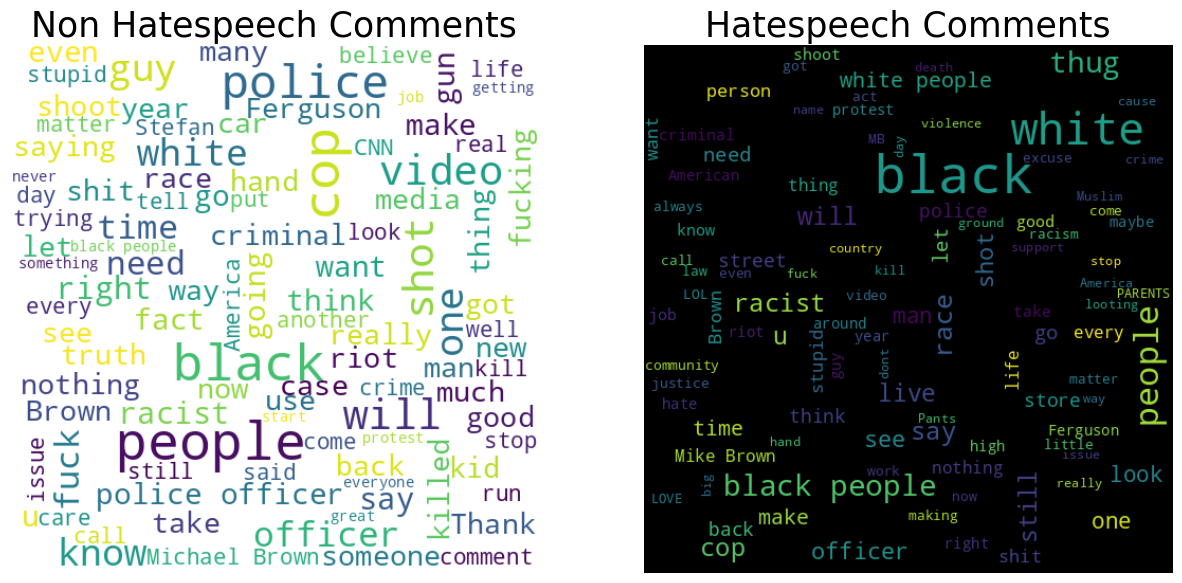

In [33]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(wordcloud_nothatespeech, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(wordcloud_hatespeech, interpolation="bilinear")
ax2.axis("off")
ax1.set_title("Non Hatespeech Comments", fontsize=25)
ax2.set_title("Hatespeech Comments", fontsize=25)
plt.show()

-----

### <span style="color:#944ea7"> 🌍 Análisis Is Racist </span>

In [34]:
# Distribution of 'Racist' column
racist_distribution = comments_data['IsRacist'].value_counts()
print(racist_distribution)

IsRacist
False    872
True     125
Name: count, dtype: int64


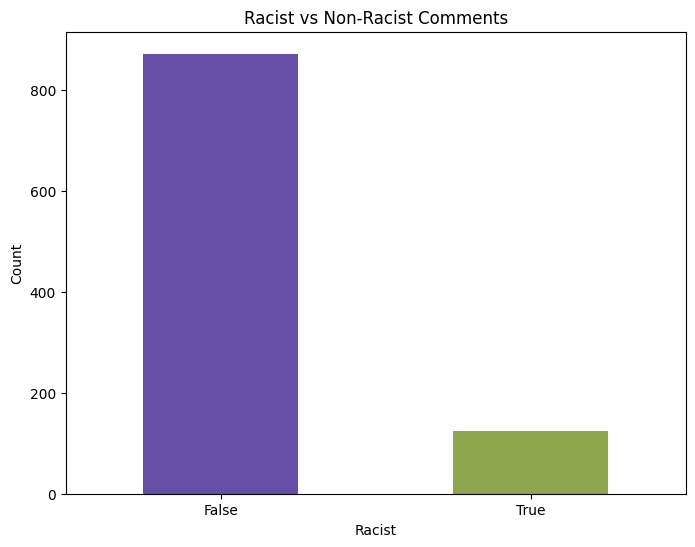

In [35]:
# Bar plot for Racist vs Non-Racist Comments
plt.figure(figsize=(8, 6))
racist_counts = comments_data['IsRacist'].value_counts()
racist_counts.plot(kind='bar', color=['#674ea7', '#8ea74e'])
plt.title('Racist vs Non-Racist Comments')
plt.xlabel('Racist')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### <span style="color:#4e62a7"> ☁ WordCloud </span>

In [36]:
notracist_comments = comments_data.Text.loc[comments_data.IsRacist==0]
new_notracist_commentss = notracist_comments.value_counts().to_frame().head(1000)
full_notracist_commentss = "".join(new_notracist_commentss.index.tolist())

racist_comments = comments_data.Text.loc[comments_data.IsRacist==1]
new_racist_commentss = racist_comments.value_counts().to_frame().head(1000)
full_racist_commentss = "".join(new_racist_commentss.index.tolist())

wordcloud_notracist = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="white") \
    .generate(full_notracist_commentss)

wordcloud_racist = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="black") \
    .generate(full_racist_commentss)

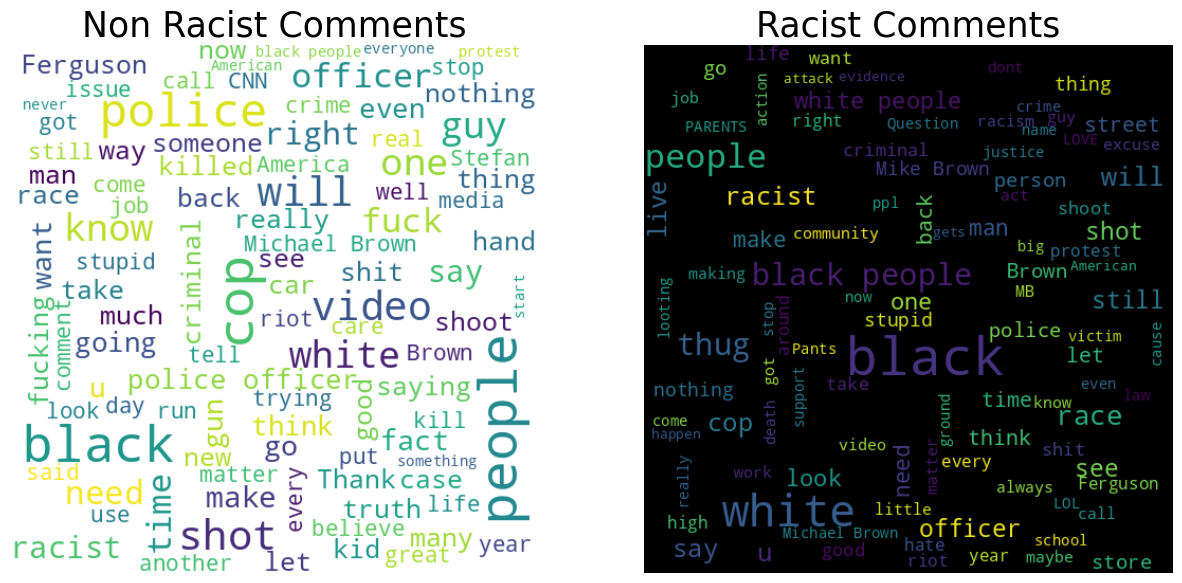

In [37]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(wordcloud_notracist, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(wordcloud_racist, interpolation="bilinear")
ax2.axis("off")
ax1.set_title("Non Racist Comments", fontsize=25)
ax2.set_title("Racist Comments", fontsize=25)
plt.show()

-------------------

### <span style="color:#944ea7"> 🙏 Análisis Is Religious Hate </span>

In [38]:
# Distribution of 'ReligiousHate' column
religiousHate_distribution = comments_data['IsReligiousHate'].value_counts()
print(religiousHate_distribution)

IsReligiousHate
False    985
True      12
Name: count, dtype: int64


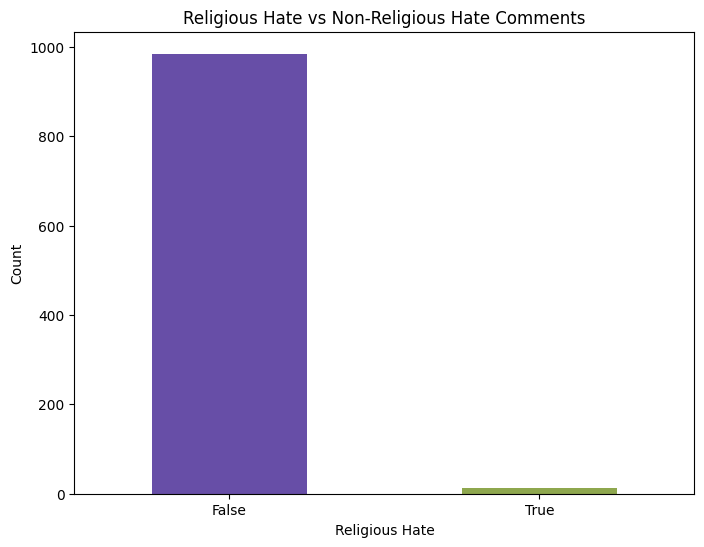

In [39]:
# Bar plot for ReligiousHate vs Non-ReligiousHate Comments
plt.figure(figsize=(8, 6))
religiousHate_counts = comments_data['IsReligiousHate'].value_counts()
religiousHate_counts.plot(kind='bar', color=['#674ea7', '#8ea74e'])
plt.title('Religious Hate vs Non-Religious Hate Comments')
plt.xlabel('Religious Hate')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### <span style="color:#4e62a7"> ☁ WordCloud </span>

In [40]:
notreligiousHate_comments = comments_data.Text.loc[comments_data.IsReligiousHate==0]
new_notreligiousHate_commentss = notreligiousHate_comments.value_counts().to_frame().head(1000)
full_notreligiousHate_commentss = "".join(new_notreligiousHate_commentss.index.tolist())

religiousHate_comments = comments_data.Text.loc[comments_data.IsReligiousHate==1]
new_religiousHate_commentss = religiousHate_comments.value_counts().to_frame().head(1000)
full_religiousHate_commentss = "".join(new_religiousHate_commentss.index.tolist())

wordcloud_notreligiousHate = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="white") \
    .generate(full_notreligiousHate_commentss)

wordcloud_religiousHate = WordCloud(max_font_size=50, max_words=100,width=500, height=500,
                      background_color="black") \
    .generate(full_religiousHate_commentss)

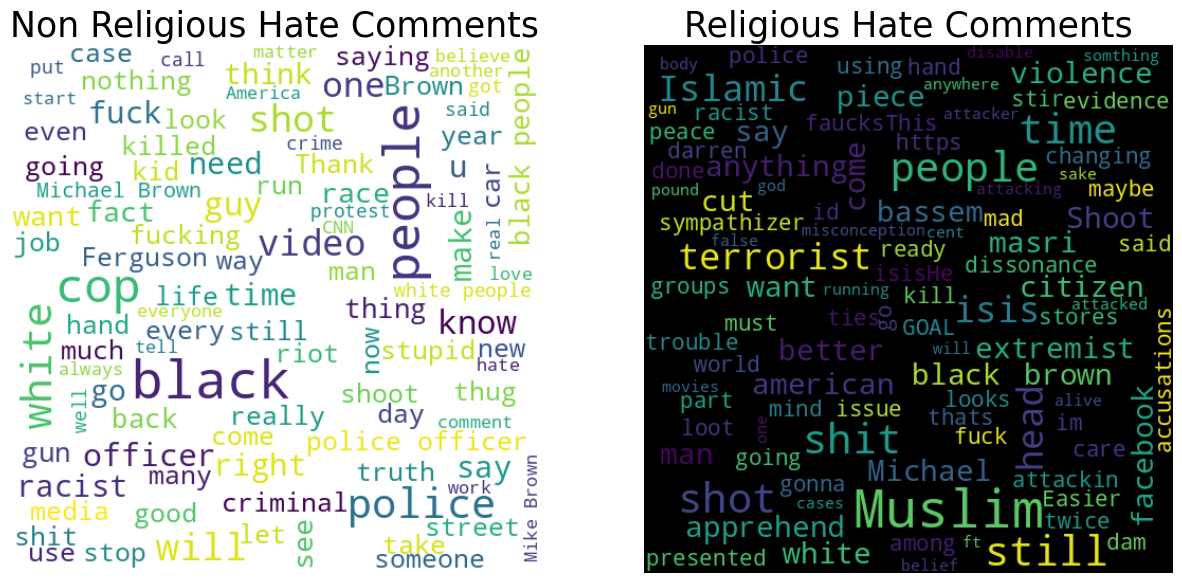

In [41]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(wordcloud_notreligiousHate, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(wordcloud_religiousHate, interpolation="bilinear")
ax2.axis("off")
ax1.set_title("Non Religious Hate Comments", fontsize=25)
ax2.set_title("Religious Hate Comments", fontsize=25)
plt.show()

-------

# <span style="color:#674ea7"> 🧼 Limpieza del texto </span>

Como se puede observar muchas palabras se repiten, lo que nos da a entender que muchos de estos comentarios dependen del contexto y para ello vamos a limpiar el texto y dejarlo listo para nuestro entrenamiento

In [42]:
def clean_text(text):
    # Reparar codificación si hay mojibake tipo "tÃªte"
    try:
        text = text.encode('latin1').decode('utf-8')
    except (UnicodeEncodeError, UnicodeDecodeError):
        pass

    # Detectar y preservar siglas antes de convertir todo a minúsculas
    siglas = re.findall(r'\b[A-Z]{2,}\b', text)

    # Convertir todo a minúsculas
    text = text.lower()

    # Restaurar siglas detectadas previamente (manteniéndolas en mayúsculas)
    words = text.split()
    processed_words = [
        word.upper() if word.upper() in siglas else word
        for word in words
    ]
    text = ' '.join(processed_words)

    # Expandir contracciones comunes en inglés
    contractions = {
        r"what's": "what is",
        r"\'s": "",
        r"\'ve": " have",
        r"can't": "cannot",
        r"n't": " not",
        r"i'm": "i am",
        r"\'re": " are",
        r"\'d": " would",
        r"\'ll": " will",
        r"\'scuse": " excuse",
    }
    for pattern, repl in contractions.items():
        text = re.sub(pattern, repl, text)

    # Eliminar símbolos no alfanuméricos
    text = re.sub(r'\W', ' ', text)

    # Reemplazar múltiples espacios por uno solo
    text = re.sub(r'\s+', ' ', text)

    # Eliminar palabras con números (ej: covid19, h1n1)
    text = re.sub(r'\w*\d\w*', '', text)

    # Quitar espacios sobrantes
    text = text.strip()

    return text

In [43]:
comments_data['Text'] = comments_data['Text'].apply(clean_text)

In [52]:
comments_data

CommentId      VideoId  \
0    Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1    Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2    Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3    Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4    Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   
..                    ...          ...   
992  Ugi5ADt10EdDz3gCoAEC  XRuCW80L9mA   
993  Ugifh2DMhBbDkHgCoAEC  XRuCW80L9mA   
994  Ugj_plbGBjjzYXgCoAEC  XRuCW80L9mA   
995  Ugj0bah1De8xy3gCoAEC  XRuCW80L9mA   
996  UgjBJKQSoQMQ6ngCoAEC  XRuCW80L9mA   

                                                  Text  IsToxic  IsAbusive  \
0    if only people would just take a step back and...    False      False   
1    law enforcement is not trained to shoot to app...     True       True   
2    dont you reckon them black lives matter banner...     True       True   
3    there are a very large number of people who do...    False      False   
4    the arab dude is absolutely right he should ha...    False      False   
..                                                 ...      ...        ...   
992  i remember that they sent in the national defe...    False      False   
993  stats don t represent the problem race baiting...     True      False   
994  the quote from the mother wow that hit hard ve...    False      False   
995                            this video is so racist    False      False   
996         god the narrator has such an annoying lisp    False      False   

     IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
0       False          False      False         False     False   
1       False          False      False         False     False   
2       False          False       True         False     False   
3       False          False      False         False     False   
4       False          False      False         False     False   
..        ...            ...        ...           ...       ...   
992     False          False      False         False     False   
993     False          False      False          True      True   
994     False          False      False         False     False   
995     False          False      False         False     False   
996     False          False      False         False     False   

     IsReligiousHate  
0              False  
1              False  
2              False  
3              False  
4              False  
..               ...  
992            False  
993            False  
994            False  
995            False  
996            False  

[997 rows x 11 columns]

In [45]:
# Eliminar texto vacio
comments_data = comments_data[comments_data['Text'].str.strip() != '']

In [46]:
# Revisar si hay un desbalance
comments_data['IsToxic'].value_counts(normalize=True)

IsToxic
False    0.539619
True     0.460381
Name: proportion, dtype: float64

In [54]:
# Guardar Dataset tratado
comments_data.to_csv("comments_data_clean.csv", index=False, encoding='utf-8')

In [53]:
comments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        997 non-null    object
 1   VideoId          997 non-null    object
 2   Text             997 non-null    object
 3   IsToxic          997 non-null    bool  
 4   IsAbusive        997 non-null    bool  
 5   IsThreat         997 non-null    bool  
 6   IsProvocative    997 non-null    bool  
 7   IsObscene        997 non-null    bool  
 8   IsHatespeech     997 non-null    bool  
 9   IsRacist         997 non-null    bool  
 10  IsReligiousHate  997 non-null    bool  
dtypes: bool(8), object(3)
memory usage: 31.3+ KB


# <span style="color:#674ea7"> 📰 Conclusión </span>

El análisis exploratorio no solo permitió depurar y comprender el contenido del dataset, sino también identificar patrones clave que influyen directamente en el entrenamiento de modelos de clasificación de texto y análisis de sentimientos. La presencia conjunta de etiquetas como IsToxic, IsHateSpeech y IsRacist revela una carga emocional negativa en muchos comentarios, lo cual sugiere que la toxicidad no es una dimensión aislada, sino una combinación de factores lingüísticos y afectivos.

Al eliminar ruido, duplicados y etiquetas de baja frecuencia, el dataset quedó optimizado para ser procesado por modelos de aprendizaje supervisado, asegurando una representación más limpia y equilibrada del discurso digital. Las correlaciones entre etiquetas ayudarán a construir modelos multiclase o multilabel con mejor sensibilidad semántica, mientras que la limpieza textual garantiza una vectorización más eficaz, ya sea con enfoques clásicos como TF-IDF o modernos como embeddings.

En definitiva, este EDA sienta las bases no solo para detectar comentarios dañinos, sino para comprender su polaridad emocional, su contexto lingüístico y su impacto potencial en entornos digitales. Es un paso esencial hacia modelos capaces de interpretar el lenguaje con una mirada crítica, ética y empática.